In [2]:
import numpy as np
import pandas as pd

def determine_lifetime(df, threshold=0.5):
    """
    Determine the lifetime of LEDs based on their luminosity decay.
    
    Parameters:
        df (pd.DataFrame): DataFrame with time and test columns representing luminosity.
        threshold (float): The luminosity threshold at which the LED is considered dead.
    
    Returns:
        tuple: A list of lifetimes and a list indicating if the lifetime was prolonged (1 for prolonged, 0 otherwise).
    """
    time_col = df['time']
    lifetimes = []
    prolonged = []

    for col in df.columns:
        if col == 'time':
            continue
        
        # Find the first time the luminosity drops below the threshold
        luminosity = df[col]
        below_threshold = luminosity < threshold
        
        if below_threshold.any():
            # Get the time at which the threshold is crossed
            death_index = below_threshold.idxmax()  # First occurrence of True
            lifetimes.append(time_col.iloc[death_index])
            prolonged.append(0)  # Not prolonged
        else:
            # Approximate using exponential decay
            # Fit an exponential function: luminosity = a * exp(-b * time)
            log_luminosity = np.log(luminosity)
            coeffs = np.polyfit(time_col, log_luminosity, 1)  # Fit log-linear model
            b, log_a = -coeffs[0], coeffs[1]
            a = np.exp(log_a)
            
            # Solve for time when luminosity = threshold
            death_time = np.log(threshold / a) / -b
            lifetimes.append(death_time)
            prolonged.append(1)  # Prolonged
    
    return lifetimes, prolonged


# Load the dataset
df = pd.read_csv("degradation_data/S1.csv")




In [3]:
lifetimes_total=[]
prolongation_status_total=[]
stress1_total=[]
stress2_total=[]

##### S1 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("degradation_data/S1.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[20] * 15
stress2_total+=[60] * 15
##### S2 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("degradation_data/S2.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[30] * 15
stress2_total+=[60] * 15
##### S3 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("degradation_data/S3.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[25] * 15
stress2_total+=[72.5] * 15
##### S4 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("degradation_data/S4.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[20] * 15
stress2_total+=[85] * 15
##### S5 #####
lifetimes,prolongation_status=determine_lifetime(pd.read_csv("degradation_data/S5.csv"))
lifetimes_total+=lifetimes
prolongation_status_total+=prolongation_status
stress1_total+=[30] * 15
stress2_total+=[85] * 15


print(lifetimes_total)
print(prolongation_status_total)
print(stress1_total)
print(stress2_total)

right_censor=[]
stress1_total_censor=[]
stress2_total_censor=[]
for i in range(len(prolongation_status_total)):
    if prolongation_status_total[i]==1:
        right_censor.append(lifetimes_total[i])
        stress1_total_censor.append(stress1_total[i])
        stress2_total_censor.append(stress2_total[i])


[4943.802479576001, 6122.724239045017, 6274.78203524984, 1392, 5930.166573377715, 6301.083145353689, 5349.056059384878, 1128, 5317.426150752668, 4988.045022705996, 1128, 4267.506949723805, 960, 3992.0456524996703, 6375.104572570106, 4106.58972215411, 5716.81875040603, 4268.224764027966, 3816.3722426105605, 5207.581195533215, 3863.639595509537, 4139.418840393708, 3037.1328495425487, 5442.00638720311, 3922.112630336849, 4413.778981822896, 3656.6743179921523, 4066.129345355324, 1857.2716054773152, 4398.08237255486, 3493.1109395356175, 2938.7211290725886, 2643.1634989521444, 3140.1990177749444, 3683.4354098855783, 2898.797507798183, 2954.892287781046, 2934.5440489324424, 2880.2852447106948, 2825.852124368327, 2725.3644523146086, 2625.9171813208013, 2774.8857158720484, 3329.9707306663627, 3685.738414860025, 2338.4354860106655, 2013.195967198616, 2258.9604462021734, 2102.926550871645, 1560, 2222.9427719526784, 1800, 1991.8396036321492, 2064.701024891147, 2149.7134139239065, 1128, 1885.574259

C:\Users\eusta\AppData\Roaming\Python\Python312\site-packages\reliability\ALT_fitters.py:919: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything_ALT:
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 75/52 (40.94488188976378% right censored) 

                    ALT_model       a       b           c         m        n    beta    sigma  Log-likelihood    AICc     BIC optimizer
    Weibull_Power_Exponential 27.5341         7.12128e+09           -3.67989 3.67372                   -653.3 1314.93 1325.98       TNC
           Weibull_Dual_Power                 9.64039e+09 -0.656003 -2.99038 3.65908                 -656.234  1320.8 1331.85  L-BFGS-B
     Weibull_Dual_Exponential 25.5212 252.626     33.0133                    3.49431                 -656.677 1321.68 1332.73       TNC
         Lognormal_Dual_Power                 9.10615e+10 -0.910443 -3.34787         0.497892        -669.927 1348.18 1359.23       TNC
  Lognormal_Power_Exponential 20.9779          2.0024e+09            -3.3393         0.501002        -670.454 1349.24 1360.28       TNC
   Lognormal_Dual_Exponenti

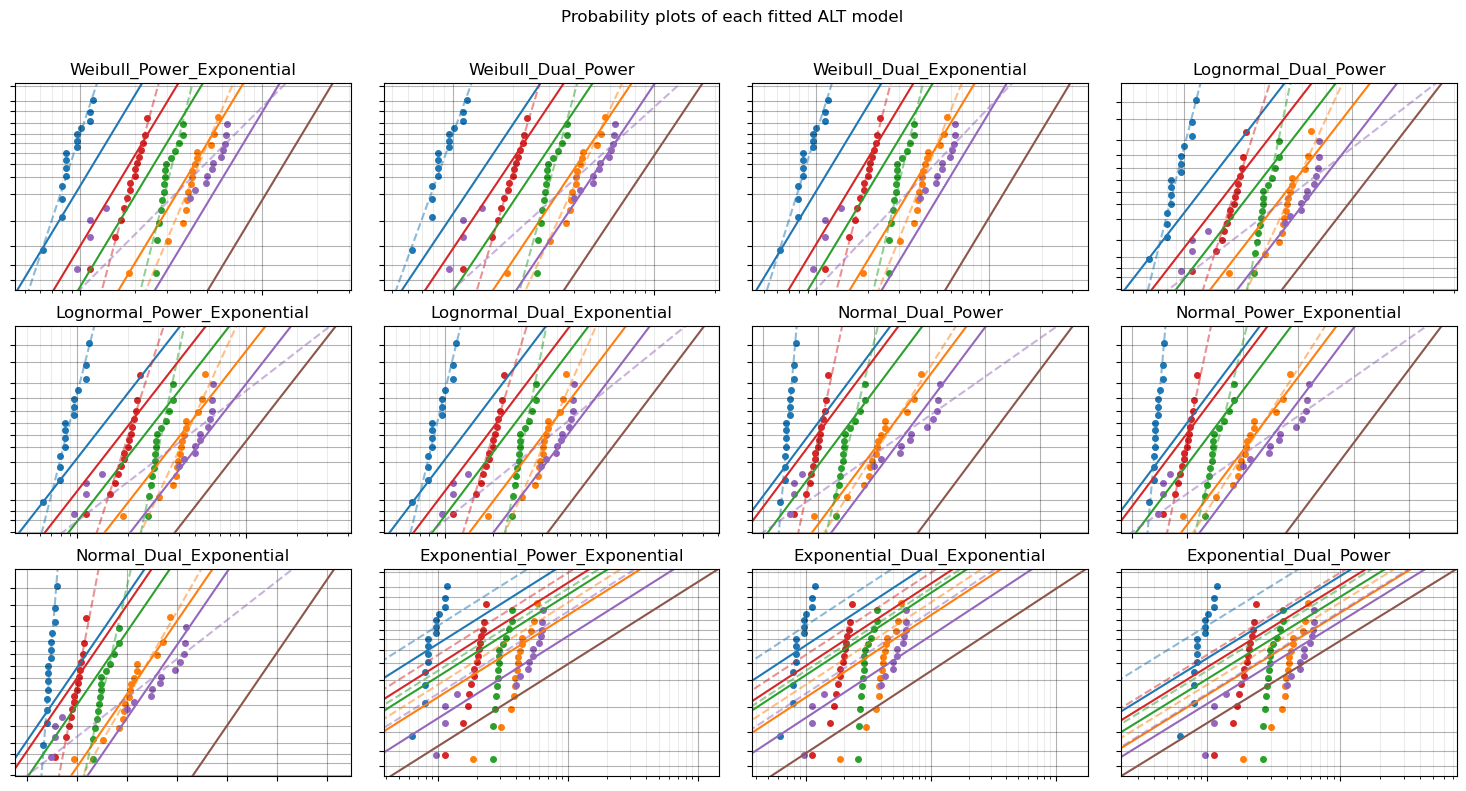

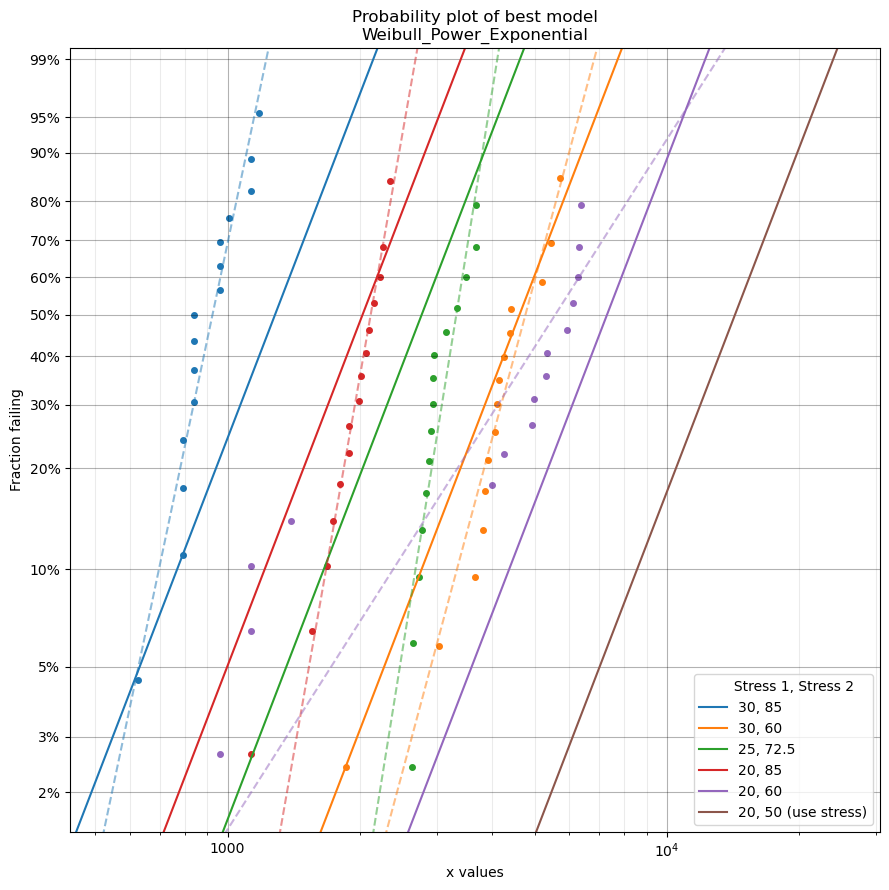

In [4]:
from reliability.ALT_fitters import Fit_Everything_ALT

Fit_Everything_ALT(failures= lifetimes_total, failure_stress_1= stress1_total, failure_stress_2=stress2_total , right_censored=right_censor , right_censored_stress_1=stress1_total_censor ,right_censored_stress_2=stress2_total_censor , use_level_stress=[20,50])

In [6]:
df = pd.read_csv("ttf_data_censoring.csv")
df.head()
values = [int(col.split('-')[1].split()[0]) for col in df.columns]
print(values)
stress1 = []
stress2 = []
failures = []
censors = []
for col in df.columns:
    valeurs_colonne = df[col].tolist()
    valeur_titre = int(col.split('-')[1].split()[0])
    for value in valeurs_colonne : 
        element = str(value)
        if "(*)" in element:
            censors.append(1)
            failures.append(float(element.replace("(*)", "").strip()))
        else:
            censors.append(0)
            failures.append(float(element.strip()))
        stress1.append(20)
        stress2.append(valeur_titre)
    # Extraire la valeur du titre (par ex. 120, 130, 140)
    
print(failures)
print(stress1)
print(stress2)
print(censors)
new_lifetimes_total = failures
new_stress1_total = stress1
new_stress2_total = stress2
new_right_censor=[]
new_stress1_total_censor=[]
new_stress2_total_censor=[]
for i in range(len(censors)):
    if prolongation_status_total[i]==1:
        new_right_censor.append(failures[i])
        new_stress1_total_censor.append(stress1[i])
        new_stress2_total_censor.append(stress2[i])


[120, 130, 140]
[321.35, 400.31, 497.12, 497.14, 514.82, 533.72, 614.26, 705.41, 706.39, 750.67, 761.22, 811.06, 831.3, 903.99, 932.97, 136.84, 167.68, 204.88, 204.88, 211.62, 218.79, 249.17, 283.19, 283.56, 299.96, 303.86, 322.22, 329.64, 356.22, 360.0, 82.55, 101.86, 125.3, 125.3, 129.56, 134.1, 153.4, 175.1, 175.33, 185.82, 188.32, 200.1, 204.87, 205.0, 205.0]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


C:\Users\eusta\AppData\Roaming\Python\Python312\site-packages\reliability\ALT_fitters.py:391: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything_ALT:
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 45/41 (47.674418604651166% right censored) 

              ALT_model           a         b        c        n    beta    sigma  Log-likelihood    AICc     BIC optimizer
    Weibull_Exponential     1175.25 0.0440456                   4.29349                 -289.504 585.301 592.371       TNC
         Weibull_Eyring     1045.77           -2.74349          4.28535                 -289.572 585.436 592.506       TNC
          Weibull_Power  5.3246e+21                    -9.05725 4.21571                  -290.15 586.592 593.662       TNC
  Lognormal_Exponential     1144.49 0.0502556                           0.342281        -291.479  589.25  596.32       TNC
       Lognormal_Eyring     1014.98           -2.87523                  0.342677        -291.527 589.347 596.417       TNC
        Lognormal_Power 5.32388e+21                    -9.07929         0.346228        -292.015 590.324

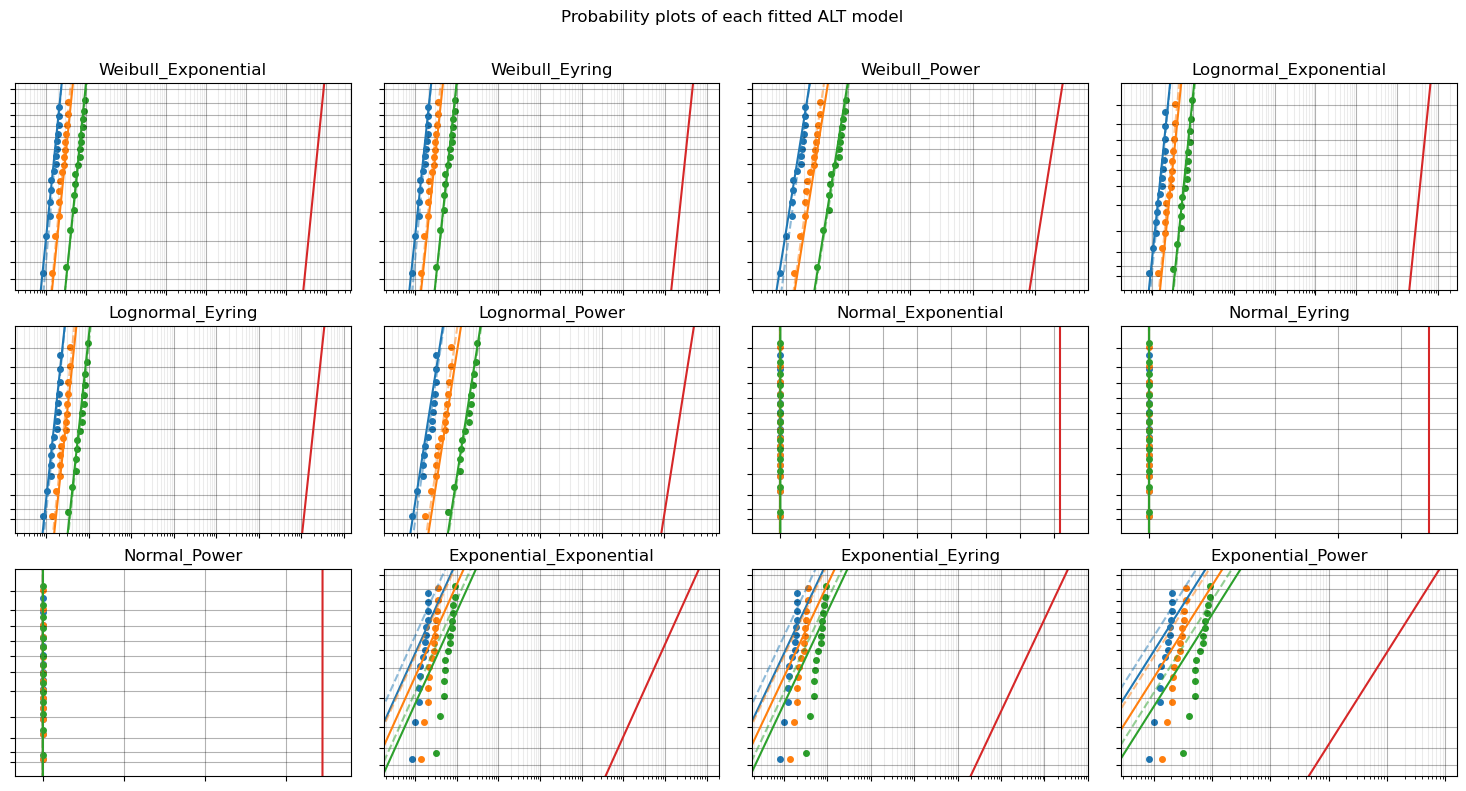

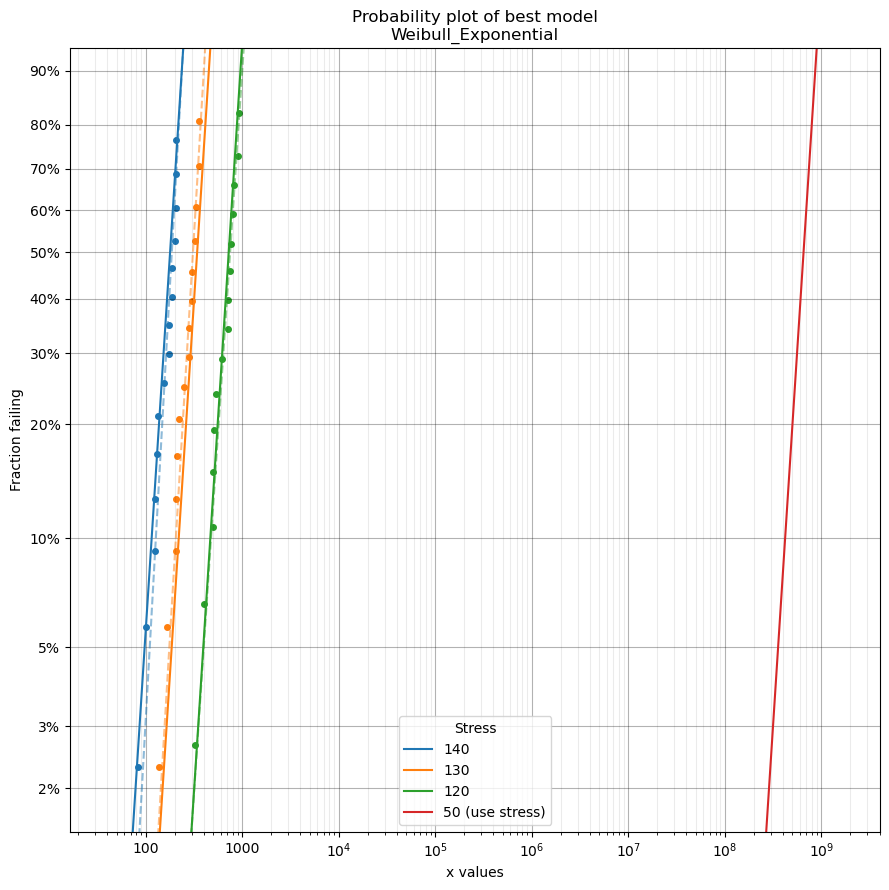

In [7]:
Fit_Everything_ALT(failures= new_lifetimes_total, failure_stress=new_stress2_total , right_censored=new_right_censor ,right_censored_stress=new_stress2_total_censor , use_level_stress=50)

C:\Users\eusta\AppData\Local\Temp\ipykernel_21024\87182160.py:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return eta * np.math.gamma(1 + 1 / beta)


MTTF (Mean Time to Failure): 589073366.01
Median Life: 594306129.19
B10 Life (90% reliability): 383224321.87


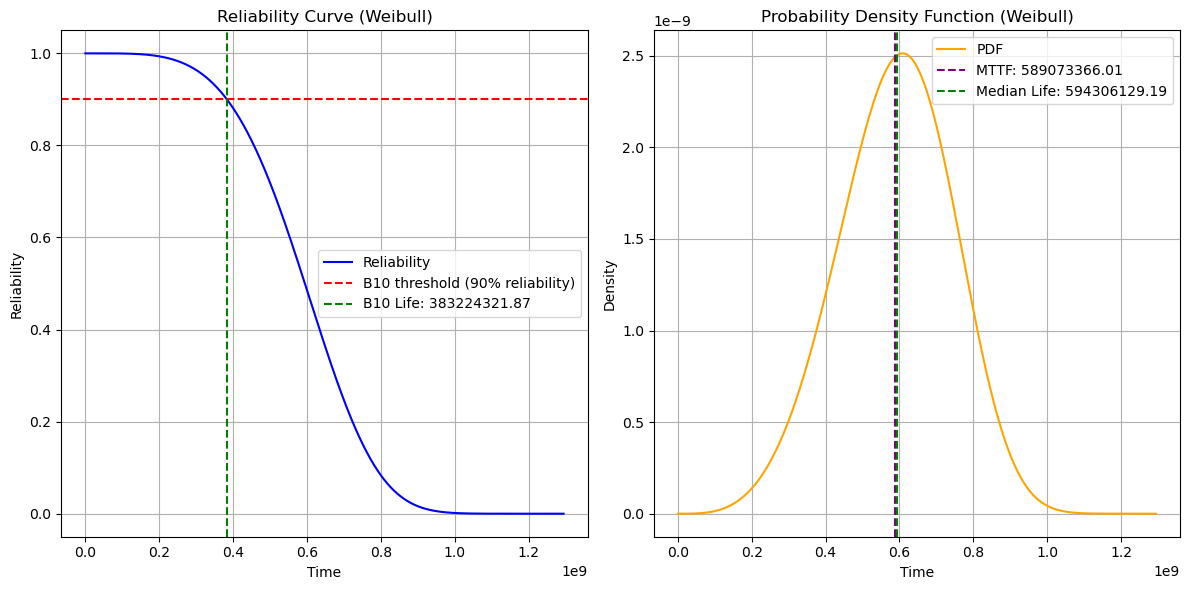

In [8]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Parameters from Weibull_Power_Exponential model
eta = 647267821.33913  # Mean life from model (scale parameter)
beta = 4.29345     # Shape parameter

# Reliability function (Weibull)
def reliability_weibull(t, eta, beta):
    return np.exp(-(t / eta) ** beta)

# Probability density function (Weibull)
def pdf_weibull(t, eta, beta):
    return (beta / eta) * (t / eta) ** (beta - 1) * np.exp(-(t / eta) ** beta)

# Mean Time to Failure (MTTF)
def mttf_weibull(eta, beta):
    return eta * np.math.gamma(1 + 1 / beta)

# Median life
def median_life_weibull(eta, beta):
    return eta * (np.log(2)) ** (1 / beta)

# B10 life (when reliability drops to 90%)
def b10_life_weibull(eta, beta):
    return eta * (-np.log(0.9)) ** (1 / beta)

# Generate data for plotting
time = np.linspace(0, 2 * eta, 1000)  # Time range for plotting
reliability = reliability_weibull(time, eta, beta)
pdf = pdf_weibull(time, eta, beta)

# Calculations
mttf = mttf_weibull(eta, beta)
median_life = median_life_weibull(eta, beta)
b10_life = b10_life_weibull(eta, beta)

# Print results
print(f"MTTF (Mean Time to Failure): {mttf:.2f}")
print(f"Median Life: {median_life:.2f}")
print(f"B10 Life (90% reliability): {b10_life:.2f}")

# Plotting the reliability and PDF
plt.figure(figsize=(12, 6))

# Reliability plot
plt.subplot(1, 2, 1)
plt.plot(time, reliability, label="Reliability", color="blue")
plt.axhline(0.9, color="red", linestyle="--", label="B10 threshold (90% reliability)")
plt.axvline(b10_life, color="green", linestyle="--", label=f"B10 Life: {b10_life:.2f}")
plt.title("Reliability Curve (Weibull)")
plt.xlabel("Time")
plt.ylabel("Reliability")
plt.legend()
plt.grid()

# PDF plot
plt.subplot(1, 2, 2)
plt.plot(time, pdf, label="PDF", color="orange")
plt.axvline(mttf, color="purple", linestyle="--", label=f"MTTF: {mttf:.2f}")
plt.axvline(median_life, color="green", linestyle="--", label=f"Median Life: {median_life:.2f}")
plt.title("Probability Density Function (Weibull)")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
